## Prelim analysis of O2 measurements

**Info from Lars:**

B474-400 seat 81k

Lufthansa orlando to Frankfurt (17 July 2016)

Takeoff 20:26 local time

Landed 10:56am local time

Load stuff

In [488]:
.libPaths("~/R/x86_64-redhat-linux-gnu-library/3.2/")
options(jupyter.plot_mimetypes = 'image/png')
options(warn = -1)

In [489]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(reshape2)

In [490]:
# Masmimo health O2 data
f = "/g/steinmetz/brooks/ph/data/o2/masimohealth.csv"
o2 = read.delim(f, sep = ",", header = T, row.names = NULL)
# convert date/time
o2$time = sapply(seq(1,dim(o2)[1]), function(i){
    date = as.POSIXct(strptime(paste(o2$Date[i], o2$Time[i], sep = " "), format = "%A, %B %e, %Y %H:%M:%S", tz = "Etc/GMT-2"))
    tor = format(date, tz="UTC",usetz=TRUE)
    #as.POSIXct(tor, tz = "UTC")
    return(tor)
})
o2$Date = NULL
o2$Time = NULL
o2$time = ymd_hms(o2$time)

In [491]:
head(o2)

,Session,Index,Timestamp,SpO2,Pulse.Rate,RRp,PVI,Perfusion.Index,time
1,2,1,1468799876,97,63,--,--,3.42,2016-07-17 23:57:56
2,2,2,1468799877,97,62,--,--,4.78,2016-07-17 23:57:57
3,2,3,1468799878,97,62,--,--,5.49,2016-07-17 23:57:58
4,2,4,1468799879,97,61,--,--,5.64,2016-07-17 23:57:59
5,2,5,1468799880,97,55,--,--,5.76,2016-07-17 23:58:00
6,2,6,1468799881,97,53,--,--,5.84,2016-07-17 23:58:01


In [492]:
takeoff = as.POSIXct("2016-07-17 20:26:00", tz = "Etc/GMT+4")
takeoff = format(takeoff, tz="UTC",usetz=TRUE)
landing = as.POSIXct("2016-07-18 10:56:00 Etc/GMT-2")
landing = format(landing, tz="UTC",usetz=TRUE)
annotation <- data.frame(
  x = c(as.POSIXct(takeoff, tz = "UTC"), as.POSIXct(landing, tz = "UTC")),
  y = c(92, 92),
  status = c("takeoff", "landing")
)

In [494]:
p <- ggplot(data = o2, aes(time, SpO2, color = as.factor(Session))) + 
    geom_point() +
    #geom_smooth() +
    #facet_wrap(~ Session) +
    scale_x_datetime(date_labels = "%b %d / %H:%M") +
    xlab("Time (UTC)") +
    geom_vline(data = annotation, aes(xintercept = as.numeric(x))) +
    geom_label(data = annotation, aes(x = x, y = y, label = status), 
               fill = "black", colour = "white", fontface = "bold", angle = 90) +
    theme(legend.position="none")

lim1 = as.POSIXct(c("2016-07-17 23:55:00 UTC", "2016-07-18 00:15:00 UTC"), tz = "UTC")
lim2 = as.POSIXct(c("2016-07-18 8:00:00 UTC", "2016-07-18 9:00:00 UTC"), tz = "UTC")
p2 <- p + geom_smooth() + scale_x_datetime(limits = lim1, date_labels = "%b %d / %H:%M")
p3 <- p + geom_smooth() + scale_x_datetime(limits = lim2, date_labels = "%b %d / %H:%M")


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


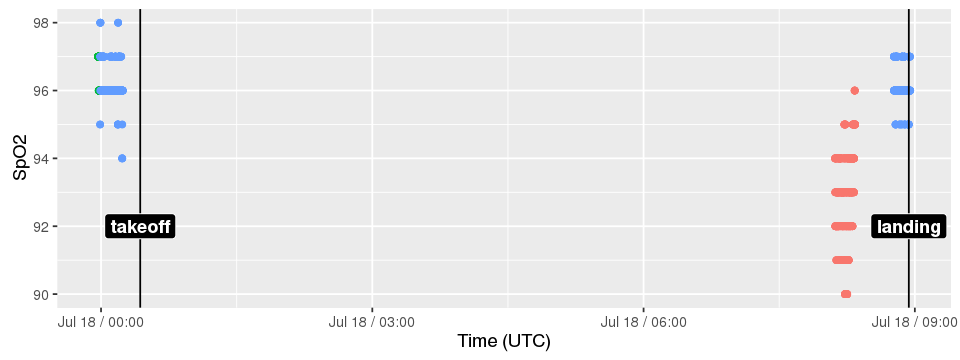

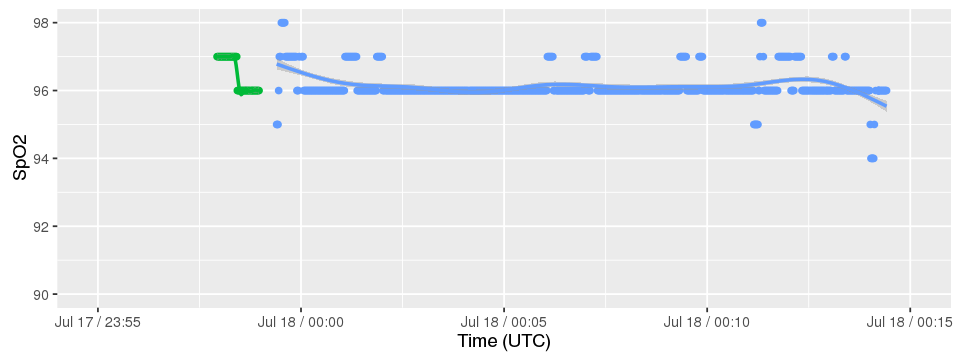

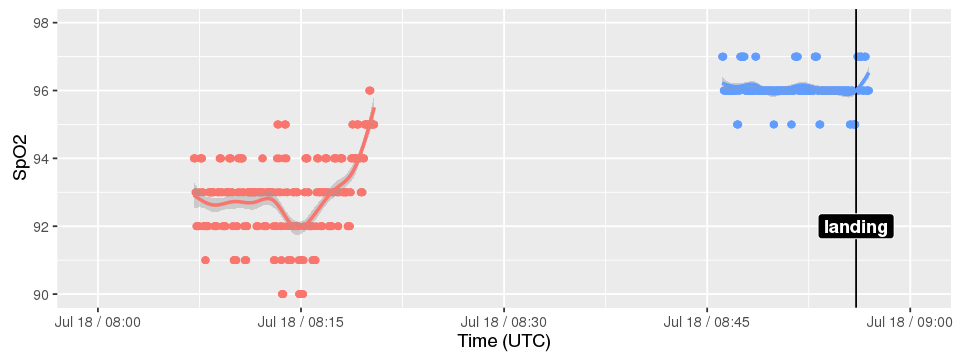

In [495]:
options(repr.plot.width = 8)
options(repr.plot.height = 3)
p 
p2
p3